<a href="https://colab.research.google.com/github/RianNugroho/pengpol/blob/master/Kmeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import random
import math
##fungsi Kmeans dan euclidean distance

def dist(arr1, arr2):
    if (len(arr1) != len(arr2)):
        return
    temp = 0
    for i in range(len(arr1)):
        temp += math.pow(arr1[i] - arr2[i], 2)
    return math.sqrt(temp)





def kmeans(no_centroid, dataset):
  #balikan  berupa koordinat centroid dan data mana termasuk centroid mana
    union = dict()
    centroid = dict()
    ##init centroid
    
    for i in range(no_centroid):
        centroid[i] = dataset[random.randint(0,len(dataset)-1 )]
       
   
    cek = False

    while (True):
        newCentro = dict()
        count = dict()
        ##inisiasi variabel sementara untuk menampung nilai centroid baru
        for i in range(len(centroid)):
            a = []
            for j in range(len(centroid[i])):
                a += [0.0]
            newCentro[i] = a
            count[i] = 0

        ##menentukan data terdekat dengan centroid mana mana
        for i in range(len(dataset)):
            min =99999999
            for j in range(len(centroid)):
                temp = dist(dataset[i], centroid[j])
                if (temp < min):
                    union[i] = j
                    min = temp

          ##mencari total nilai dari data yang termasuk sebuah centroid

            for j in range(len(dataset[i])):
                newCentro[union[i]][j] += dataset[i][j]
            count[union[i]] += 1

        ##mencari average centroid. jika perubahan tiap centroid kurang dari 0.0000000000001, maka iterasi selesai

        for i in range(len(newCentro)):
            for j in range(len(newCentro[i])):
                if (count[i] != 0):
                    newCentro[i][j] /= count[i]

        for i in range(len(newCentro)):
            if (dist(newCentro[i], centroid[i]) < 0.00000001):
                cek=True


        if (cek):
            break
        else:
            for i in range(len(centroid)):
                if (count[i] != 0):
                    centroid[i] = newCentro[i]
    dataInCentroid=dict()
    for i in range(no_centroid):
      dataInCentroid[i]=[]
    for i in range(len(dataset)):
      dataInCentroid[union[i]]+=[i]
    return centroid,dataInCentroid



In [3]:
kmeans(3,[[1,2,3],[4,5,6],[7,8,9]])

({0: [4, 5, 6], 1: [1, 2, 3], 2: [4, 5, 6]}, {0: [1, 2], 1: [0], 2: []})

In [0]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [0]:
file=pd.read_csv("https://raw.githubusercontent.com/RianNugroho/pengpol/master/studentInfo.csv")

In [0]:
#import dataset masukkan ke datasets berupa dataset yang dikategorikan berdasarkan code_module. 
##dan dataset1 berupa dataset yang disimpan berdasarkan
##ID data
dataset1=[]
datasets=dict()
datasets[0]=[]
datasets[1]=[]
datasets[2]=[]
datasets[3]=[]
datasets[4]=[]
datasets[5]=[]
datasets[6]=[]


for i in range(len(file["id_student"])):
  fr=""
  he=""
  index=0
  if(file["final_result"][i]=='Pass'):
    fr=3
  elif (file["final_result"][i]=='Withdrawn'):
    fr=2
  elif (file["final_result"][i]=='Distinction'):
    fr=1
  else:
    fr=0
  if(file["highest_education"][i]=='Lower Than A Level'):
    he=0
  elif(file["highest_education"][i]=='A Level or Equivalent'):
    he=1
  elif(file["highest_education"][i]=='HE Qualification'):
    he=2
  else:
    he=3
  if(file["code_module"][i]=="AAA"):
    index=0
  elif(file["code_module"][i]=="BBB"):
    index=1
  elif(file["code_module"][i]=="CCC"):
    index=2
  elif(file["code_module"][i]=="DDD"):
    index=3
  elif(file["code_module"][i]=="EEE"):
    index=4
  elif(file["code_module"][i]=="FFF"):
    index=5
  elif(file["code_module"][i]=="GGG"):
    index=6
  datasets[index]+=[[he,file["studied_credits"][i],fr]]
  dataset1+=[[he,file["studied_credits"][i],fr]]




In [0]:
#membuat Kmeans dengan 3,5,7, dan 20 centroid
dim3=[]
for i in range(len(datasets)):
  dim3+=[kmeans(3,datasets[i])]
  

In [0]:
dim5=[]
for i in range(len(datasets)):
  dim5+=[kmeans(5,datasets[i])]
  

In [0]:
dim7=[]
for i in range(len(datasets)):
  dim7+=[kmeans(7,datasets[i])]
  

In [0]:
dim20=[]
for i in range(len(datasets)):
  dim20+=[kmeans(20,datasets[i])]
  

In [0]:

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np

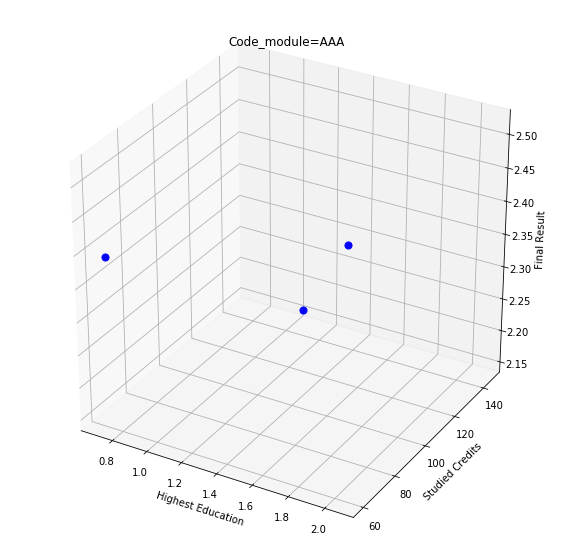

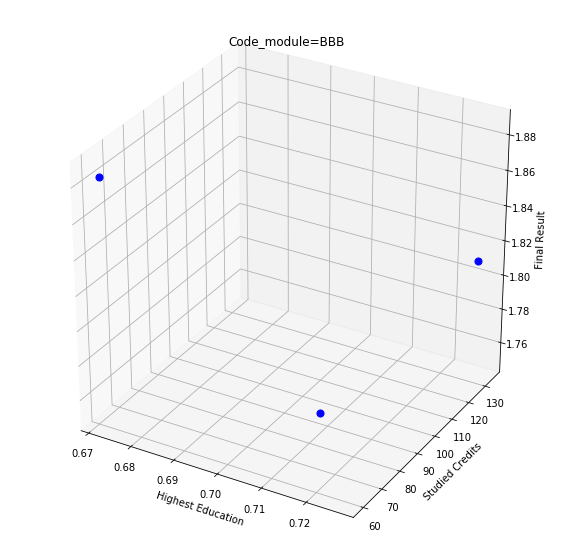

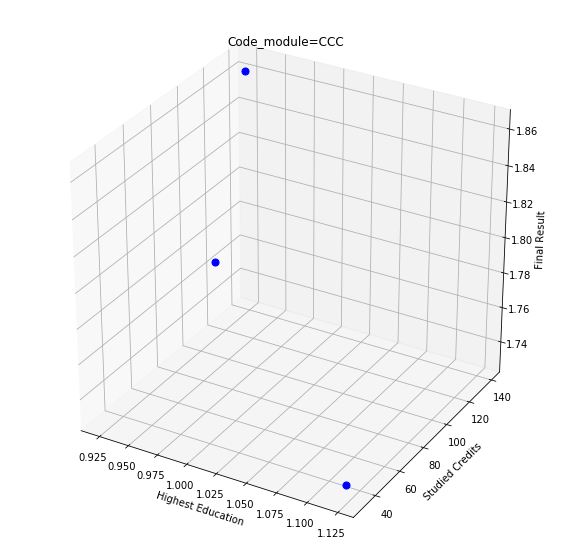

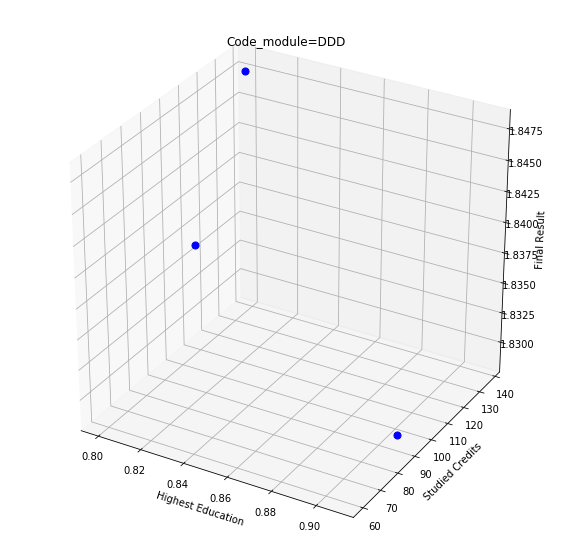

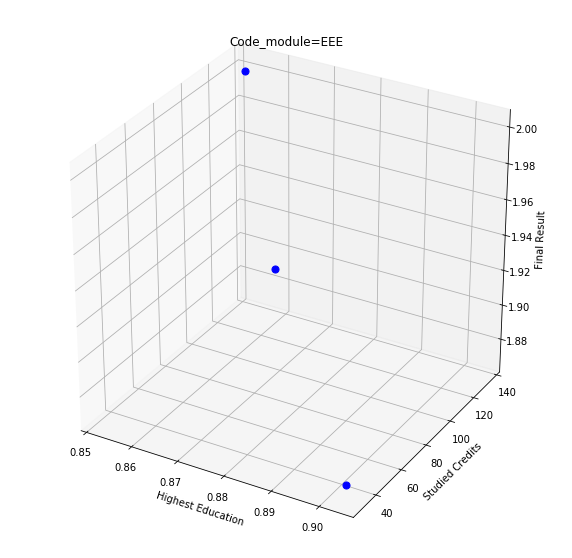

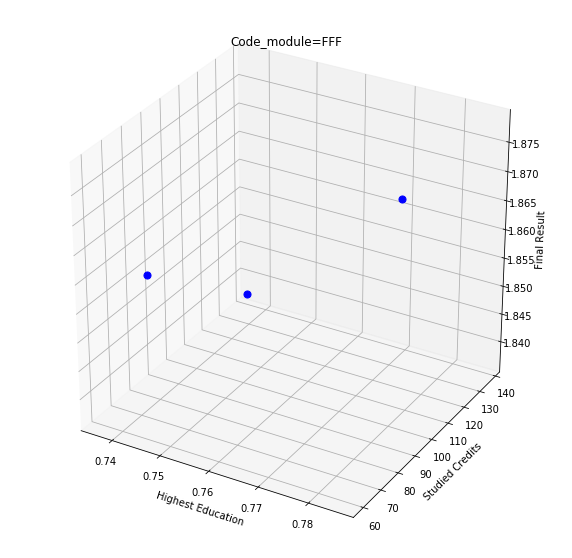

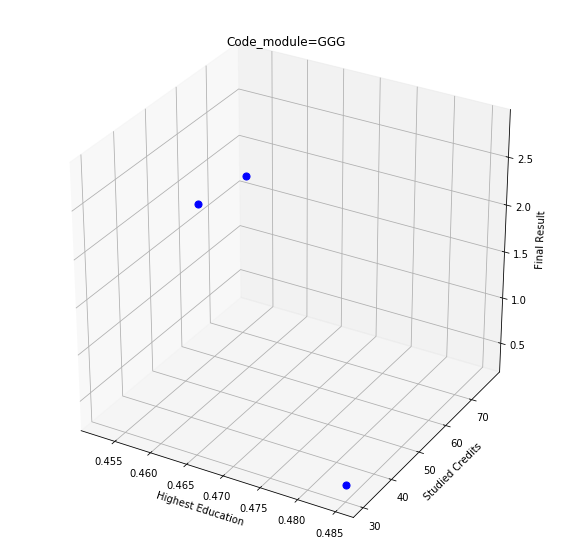

In [12]:
#membuat plot untuk masing-masing Kmeans
for j in range(len(dim3)):
  fig = plt.figure(figsize=(10,10))
  ax = fig.add_subplot(111, projection='3d')
  for i in range(len(dim3[j][0])):
    xs=dim3[j][0][i][0]
    ys=dim3[j][0][i][1]
    zs=dim3[j][0][i][2]
    ax.scatter(xs, ys, zs,s=50, c='b')
  if(j==0):
     plt.title("Code_module=AAA")
  elif(j==1):
     plt.title("Code_module=BBB")
  elif(j==2):
     plt.title("Code_module=CCC")
  elif(j==3):
     plt.title("Code_module=DDD")
  elif(j==4):
     plt.title("Code_module=EEE")
  elif(j==5):
     plt.title("Code_module=FFF")
  elif(j==6):
     plt.title("Code_module=GGG")
  ax.set_xlabel('Highest Education')
  ax.set_ylabel('Studied Credits')
  ax.set_zlabel('Final Result')

  plt.show()

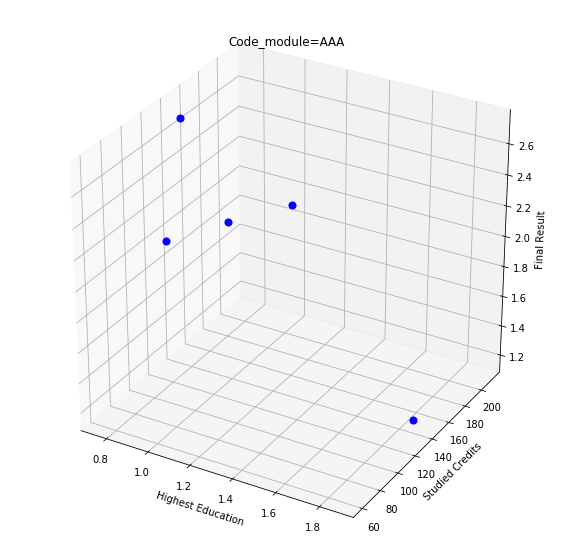

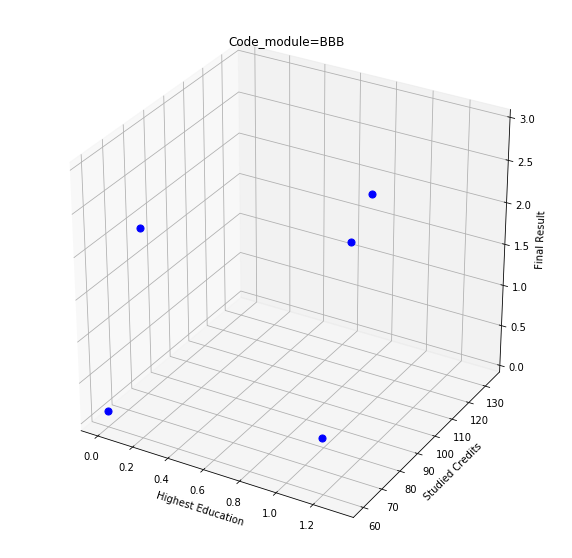

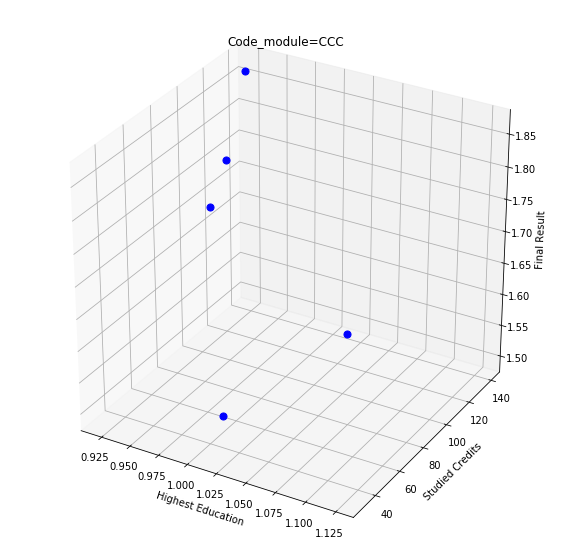

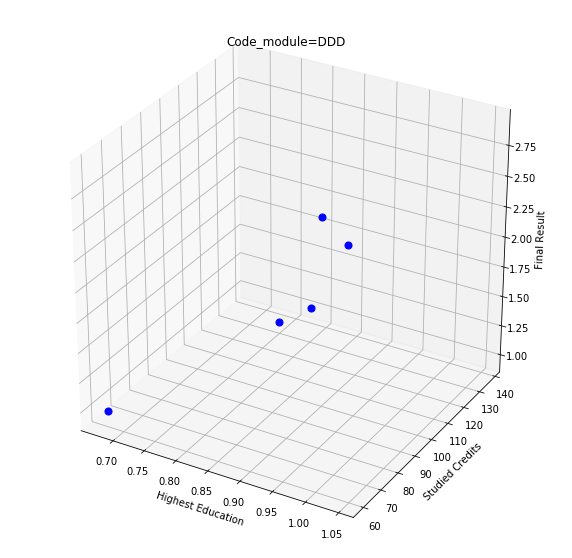

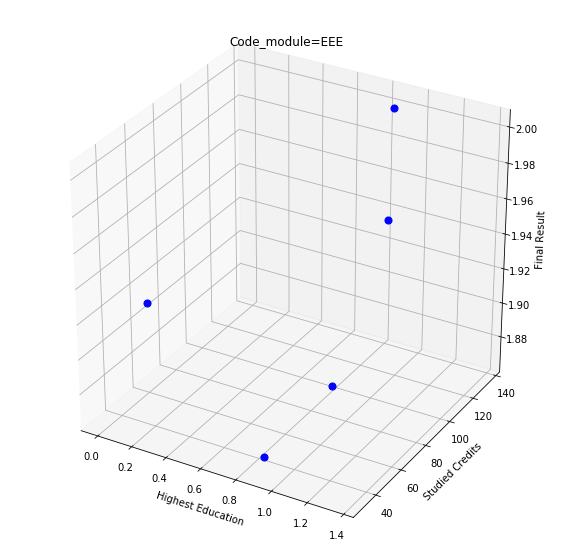

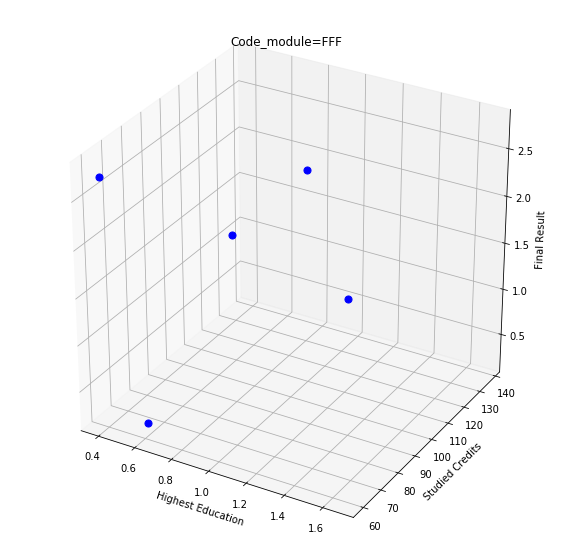

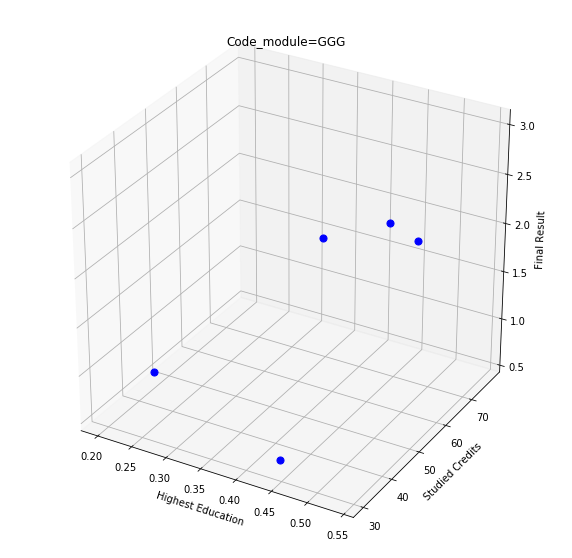

In [13]:
for j in range(len(dim5)):
  fig = plt.figure(figsize=(10,10))
  ax = fig.add_subplot(111, projection='3d')
  for i in range(len(dim5[j][0])):
    xs=dim5[j][0][i][0]
    ys=dim5[j][0][i][1]
    zs=dim5[j][0][i][2]
    ax.scatter(xs, ys, zs,s=50, c='b')
  if(j==0):
     plt.title("Code_module=AAA")
  elif(j==1):
     plt.title("Code_module=BBB")
  elif(j==2):
     plt.title("Code_module=CCC")
  elif(j==3):
     plt.title("Code_module=DDD")
  elif(j==4):
     plt.title("Code_module=EEE")
  elif(j==5):
     plt.title("Code_module=FFF")
  elif(j==6):
     plt.title("Code_module=GGG")
  ax.set_xlabel('Highest Education')
  ax.set_ylabel('Studied Credits')
  ax.set_zlabel('Final Result')

  plt.show()

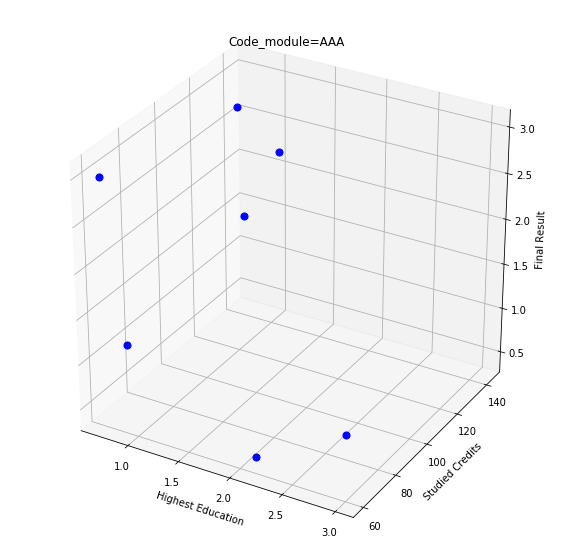

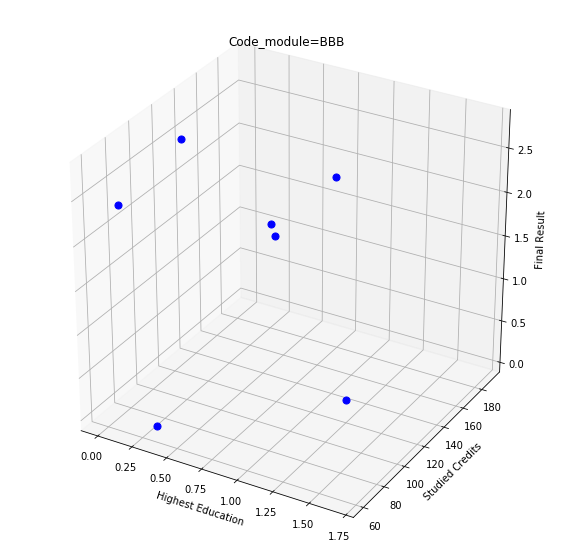

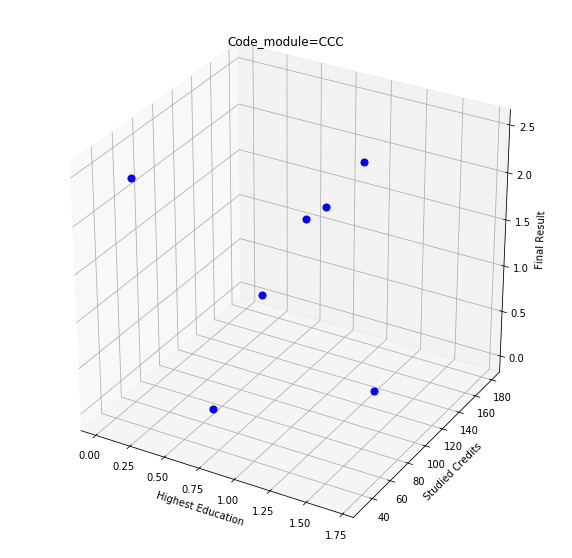

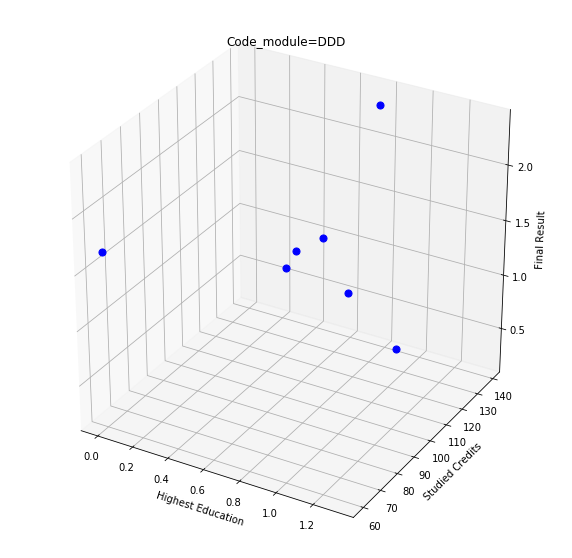

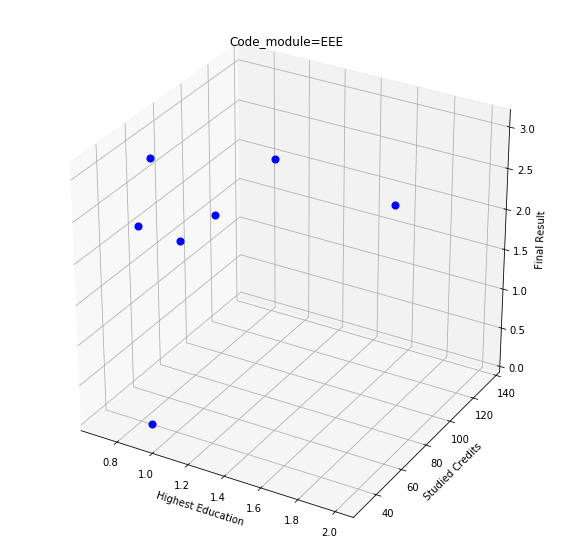

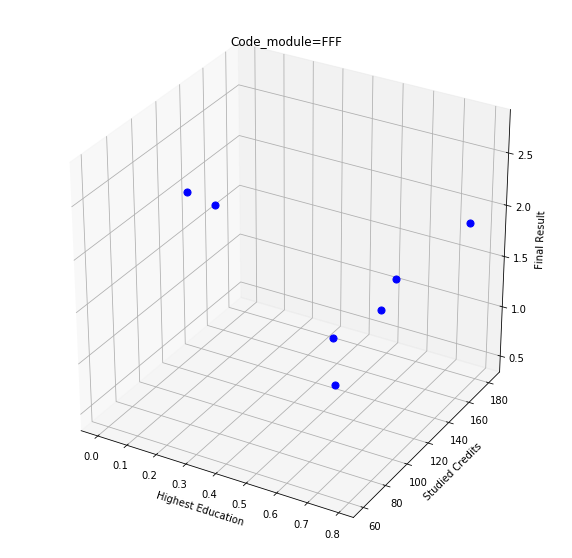

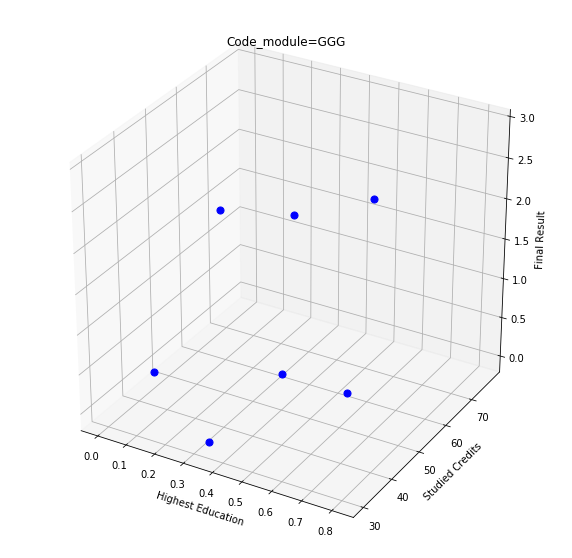

In [14]:
for j in range(len(dim7)):
  fig = plt.figure(figsize=(10,10))
  ax = fig.add_subplot(111, projection='3d')
  for i in range(len(dim7[j][0])):
    xs=dim7[j][0][i][0]
    ys=dim7[j][0][i][1]
    zs=dim7[j][0][i][2]
    ax.scatter(xs, ys, zs,s=50, c='b')
  if(j==0):
     plt.title("Code_module=AAA")
  elif(j==1):
     plt.title("Code_module=BBB")
  elif(j==2):
     plt.title("Code_module=CCC")
  elif(j==3):
     plt.title("Code_module=DDD")
  elif(j==4):
     plt.title("Code_module=EEE")
  elif(j==5):
     plt.title("Code_module=FFF")
  elif(j==6):
     plt.title("Code_module=GGG")
  ax.set_xlabel('Highest Education')
  ax.set_ylabel('Studied Credits')
  ax.set_zlabel('Final Result')

  plt.show()

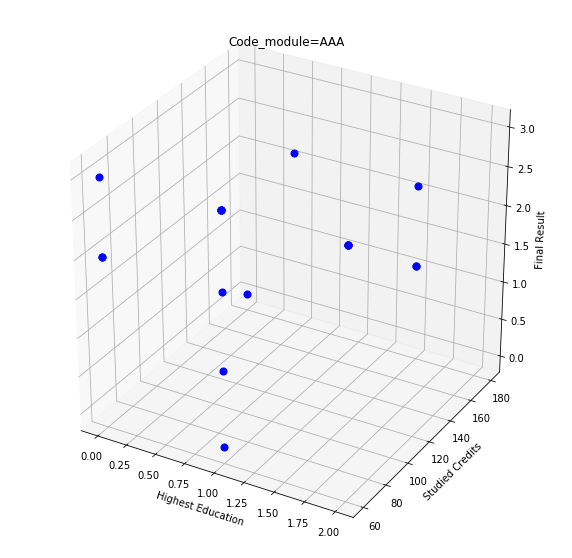

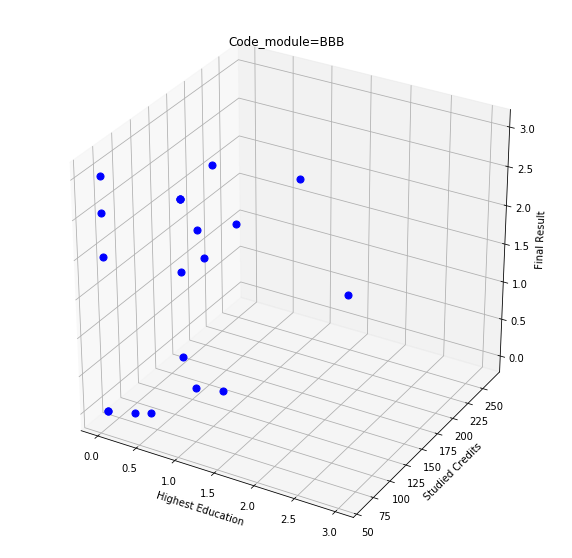

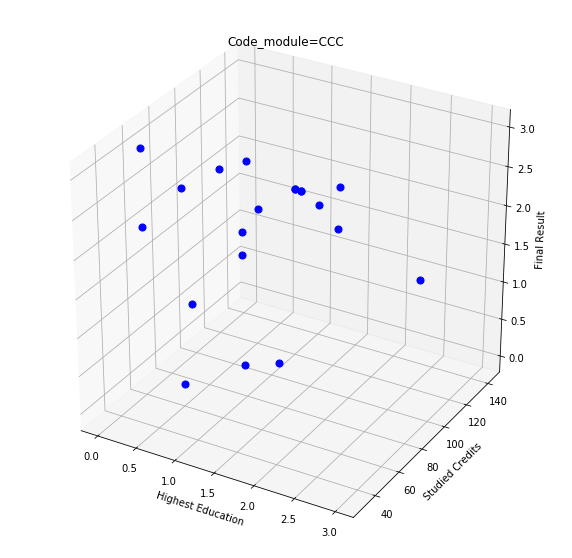

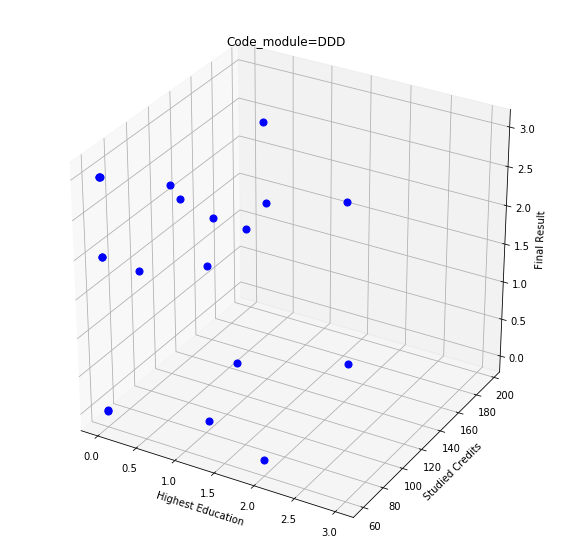

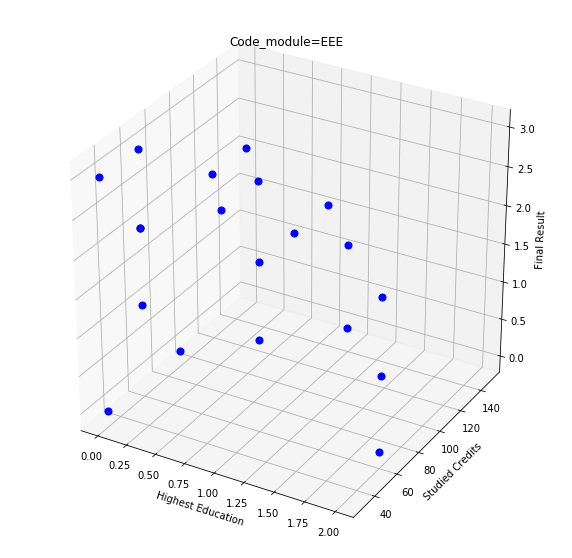

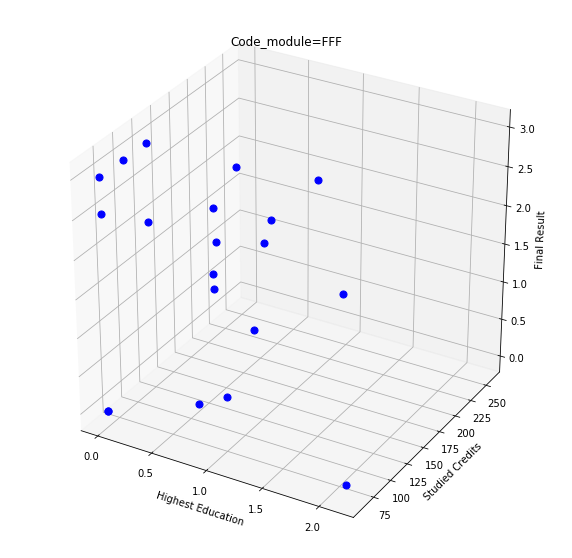

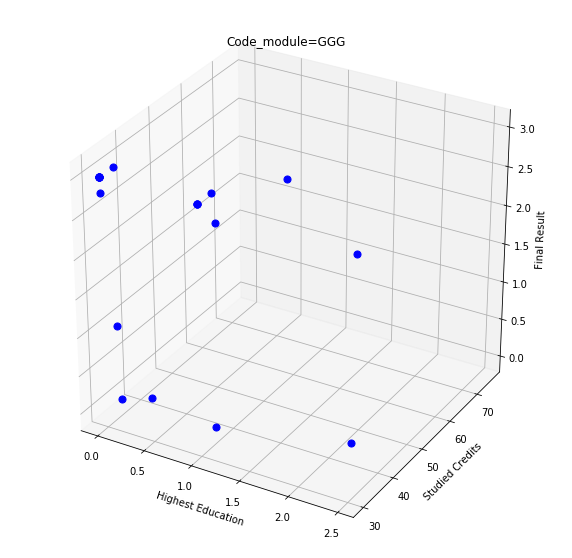

In [15]:
for j in range(len(dim20)):
  fig = plt.figure(figsize=(10,10))
  ax = fig.add_subplot(111, projection='3d')
  for i in range(len(dim20[j][0])):
    xs=dim20[j][0][i][0]
    ys=dim20[j][0][i][1]
    zs=dim20[j][0][i][2]
    ax.scatter(xs, ys, zs,s=50, c='b')
  if(j==0):
     plt.title("Code_module=AAA")
  elif(j==1):
     plt.title("Code_module=BBB")
  elif(j==2):
     plt.title("Code_module=CCC")
  elif(j==3):
     plt.title("Code_module=DDD")
  elif(j==4):
     plt.title("Code_module=EEE")
  elif(j==5):
     plt.title("Code_module=FFF")
  elif(j==6):
     plt.title("Code_module=GGG")
  ax.set_xlabel('Highest Education')
  ax.set_ylabel('Studied Credits')
  ax.set_zlabel('Final Result')

  plt.show()

In [0]:
def SillhouteCoeff(dataInCentroid,datasets):
  #silhouette Coefficient berdasarkan 
  ##https://stackoverflow.com/questions/23387275/how-do-you-manually-compute-for-silhouette-cohesion-and-separation-of-cluster
    maxCoeff=-2
    for i in range(len(dataInCentroid)):
        averageInternalDist=0.0
        if(len(dataInCentroid[i])!=0):
          for j in range(len(dataInCentroid[i])):
              if(j!=0):           
                  averageInternalDist+=dist(datasets[dataInCentroid[i][0]],datasets[dataInCentroid[i][j]])
          if(len(dataInCentroid[i])!=0):
            averageInternalDist/=len(dataInCentroid[i])
        minDist=99999999999
        for j in range(len(dataInCentroid)):
            if(i!=j):
              averageExtClusterDist=0.0
              if(len(dataInCentroid[i])!=0 and len(dataInCentroid[j])!=0):
                for k in range(len(dataInCentroid[j])):                 
                    averageExtClusterDist+=dist(datasets[dataInCentroid[i][0]],datasets[dataInCentroid[j][k]])
                if(len(dataInCentroid[j])!=0):
                    averageExtClusterDist/=len(dataInCentroid[j])
                if(averageExtClusterDist<minDist):
                    minDist=averageExtClusterDist
        averageExtClusterDist=minDist
        temp=0
        if(averageExtClusterDist!=0):
          temp=1-(averageInternalDist/averageExtClusterDist)
        
        if(temp>maxCoeff):
             maxCoeff=temp

    return maxCoeff

In [17]:
#silhoutte coefficient berdasarkan code_module tiap Kmeans
for i in range(len(dim3)):
  
  print(SillhouteCoeff(dim3[i][1],dataset1))

0.8294623860396912
0.11585177732325824
-0.015226677654270437
-0.01495959419607984
0.039535036622498354
0.0440153298698569
0.04292449654330033


In [18]:
for i in range(len(dim5)):
  print(SillhouteCoeff(dim5[i][1],dataset1))

1.0
0.0962667253385946
0.5975611006015286
-0.020047030314958025
0.05305616299474525
0.0440153298698569
0.10095745403618317


In [19]:
for i in range(len(dim7)):
  print(SillhouteCoeff(dim7[i][1],dataset1))

1.0
0.03799072256813796
0.0708696004781576
-0.021183877117571193
0.6135888142218411
0.023297151103948033
1.0


In [20]:
for i in range(len(dim20)):
  print(SillhouteCoeff(dim20[i][1],dataset1))

1.0
1.0
1.0
1.0
1.0
0.0350922062359984
1.0
